In [1]:
import pandas as pd

# Assignment 1: pd.Concat

Combine the 2014 and 2015 data you wrote out in the last section into a single dataframe. 

Then delete the transactions DataFrame (there is a handy base Python keyword for this).

In [2]:
# Code to read in transactions data if you need to re-create CSV/Excel files from section 8 
# NOTE: You won't have the extra columns we created but it won't matter for this assignment

# transactions = pd.read_csv("../retail/transactions.csv", parse_dates=["date"])

# Excel

# with pd.ExcelWriter("DataForChandler.xlsx") as writer:
#     for year in range(2013, 2018):
#         transactions.loc[transactions["date"].dt.year == year].to_excel(
#             writer, sheet_name=str(year)
#         )
        
# CSV  

# for year in range(2013, 2018):
#     transactions.loc[transactions["date"].dt.year == year].to_csv(
#         f"transactions_{year}.csv"
#     )

In [3]:
transactions = pd.concat(
    (pd.read_csv("transactions_2014.csv"),
     pd.read_csv("transactions_2015.csv"))
).drop(["Unnamed: 0"], axis = 1)

transactions

,Date,Store_number,Transaction_count,target_pct,met_target,bonus_payable,month,day_of_week
0,2014-01-01,25,840,0.3360,False,False,1,2
1,2014-01-01,36,487,0.1948,False,False,1,2
2,2014-01-02,1,1875,0.7500,False,False,1,3
3,2014-01-02,2,2122,0.8488,False,False,1,3
4,2014-01-02,3,3350,1.3400,True,False,1,3
...,...,...,...,...,...,...,...,...
18341,2015-12-31,49,3828,1.5312,True,False,12,3
18342,2015-12-31,50,2948,1.1792,True,False,12,3
18343,2015-12-31,51,2892,1.1568,True,False,12,3
18344,2015-12-31,53,2300,0.9200,False,False,12,3


In [6]:
transactions = pd.concat(
    pd.read_excel("DataForChandler.xlsx", sheet_name=[1,2]),
    ignore_index = True
).drop(["Unnamed: 0"], axis = 1)



In [7]:
transactions

,Date,Store_number,Transaction_count,target_pct,met_target,bonus_payable,month,day_of_week
0,2014-01-01,25,840,0.3360,False,False,1,2
1,2014-01-01,36,487,0.1948,False,False,1,2
2,2014-01-02,1,1875,0.7500,False,False,1,3
3,2014-01-02,2,2122,0.8488,False,False,1,3
4,2014-01-02,3,3350,1.3400,True,False,1,3
...,...,...,...,...,...,...,...,...
35479,2015-12-31,49,3828,1.5312,True,False,12,3
35480,2015-12-31,50,2948,1.1792,True,False,12,3
35481,2015-12-31,51,2892,1.1568,True,False,12,3
35482,2015-12-31,53,2300,0.9200,False,False,12,3


# Assignment 2: Joins

Can you join retail.csv with stores.csv? You'll need to read both files in.

Once you have that, plot:
* Total sales by city, 
* The sum of sales by “type” over time,
* A stacked bar chart with average daily sales by type by month, with “type” as the “stacks”. 


In [8]:
retail = pd.read_csv("../retail/retail_2016_2017.csv", parse_dates=["date"])
stores = pd.read_csv("../retail/stores.csv")

In [11]:
retail_store= retail.merge(stores, how="left", left_on = "store_nbr", right_on="store_nbr")

In [12]:
retail_store.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
1,1945945,2016-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2,1945946,2016-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
3,1945947,2016-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
4,1945948,2016-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13


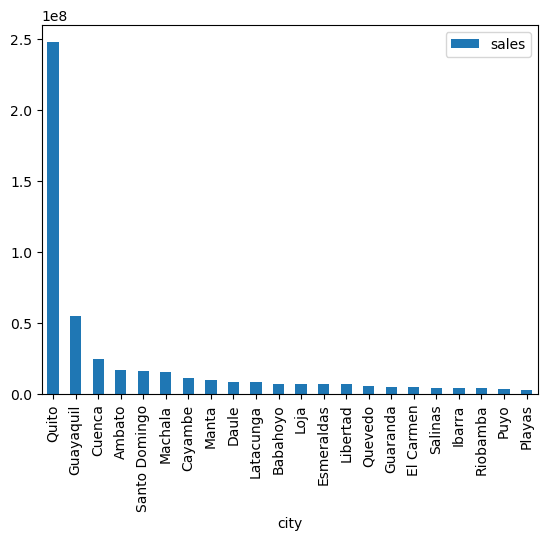

In [15]:
(retail_store
 .groupby(["city"])
 .agg({"sales":"sum"})
 .sort_values(by="sales", ascending=False)).plot.bar();

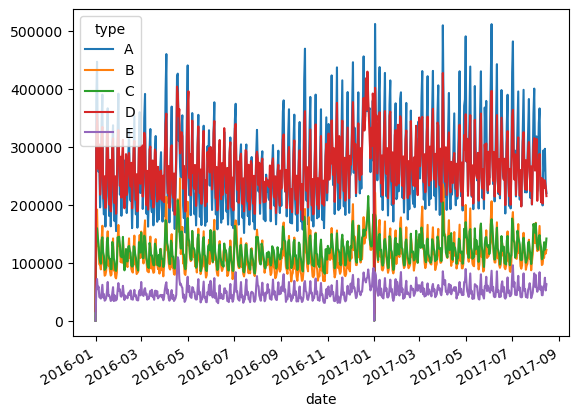

In [18]:
retail_store.pivot_table(
    index=["date"],
    columns="type",
    values="sales",
    aggfunc="sum"
).plot();

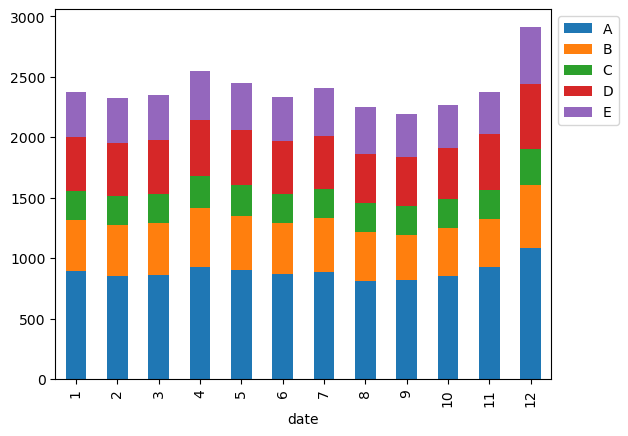

In [20]:
retail_store.pivot_table(
    index="type",
    columns=retail_store["date"].dt.month,
    values="sales",
    aggfunc="mean"
).T.plot.bar(stacked=True).legend(bbox_to_anchor=(1,1));